In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

#Importando os Dados

In [ ]:
tweets_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto Twitter/Tweets_urna_eletronica4.csv')

In [ ]:
tweets_df

,author_id,text,created_at,geo,lang,retweet_count,reply_count,like_count,quote_count,Negative,Neutral,Positive
0,1241844113806409734,https://t.co/e7CfTMpDQj,2022-08-30 17:49:53+00:00,NaN,zxx,0,0,0,0,0.252030,0.476406,0.271564
1,16194637,Conversei com uma pessoa que não confia 100% n...,2022-08-30 17:44:46+00:00,NaN,pt,0,0,0,0,0.103220,0.808822,0.087958
2,1192072181523591168,Eu me retiro carregando a urna eletrônica leva...,2022-08-30 17:27:59+00:00,NaN,pt,0,0,1,0,0.048444,0.873557,0.078000
3,488760669,Urna eletrônica e códigos-fonte são validados ...,2022-08-30 17:26:07+00:00,NaN,pt,0,0,0,0,0.123783,0.830419,0.045797
4,76742645,"@Biakicis Não, ainda. Esperemos até 31.Dez.202...",2022-08-30 17:20:06+00:00,{'place_id': '68e019afec7d0ba5'},pt,0,0,0,0,0.098264,0.836509,0.065227
...,...,...,...,...,...,...,...,...,...,...,...,...
2934,1556035321632100353,TSE lança simulador de votação na urna eletrôn...,2022-08-23 18:08:45+00:00,NaN,pt,0,0,0,0,0.070291,0.885614,0.044095
2935,1262479916915924992,"@Zambelli2210 E os Senadores,vão deixar ele fa...",2022-08-23 18:08:45+00:00,NaN,pt,0,0,0,0,0.079322,0.736071,0.184606
2936,1328696398959828993,As conversas do whatsapp do Adélio são tipo a ...,2022-08-23 18:07:49+00:00,NaN,pt,0,1,2,0,0.134380,0.810202,0.055418
2937,1419627961163071494,TSE lança simulador de votação na urna eletrôn...,2022-08-23 18:07:21+00:00,NaN,pt,0,0,0,0,0.087939,0.868778,0.043283


#Analisando os Dados

In [ ]:
df_descritivo = pd.DataFrame(tweets_df[['retweet_count','reply_count','like_count','quote_count','Positive', 'Negative', 'Neutral']].describe())
df_descritivo

,retweet_count,reply_count,like_count,quote_count,Positive,Negative,Neutral
count,2939.00000,2939.00000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,2.14869,1.06771,16.774413,0.150391,0.087681,0.116519,0.795800
std,33.63344,12.07233,301.711827,1.729645,0.107494,0.090560,0.124450
min,0.00000,0.00000,0.000000,0.000000,0.018722,0.001215,0.056208
25%,0.00000,0.00000,0.000000,0.000000,0.044731,0.071297,0.780221
50%,0.00000,0.00000,0.000000,0.000000,0.054357,0.097838,0.841304
75%,0.00000,0.00000,2.000000,0.000000,0.077771,0.129763,0.863061
max,1543.00000,535.00000,14512.000000,75.000000,0.940955,0.714642,0.923633


##Entendendo Retweets

Filtrando os tweets que não tiveram nenhum retweet

In [ ]:
selecao = tweets_df['retweet_count'] > 0
tweets_df[selecao].shape[0]

437

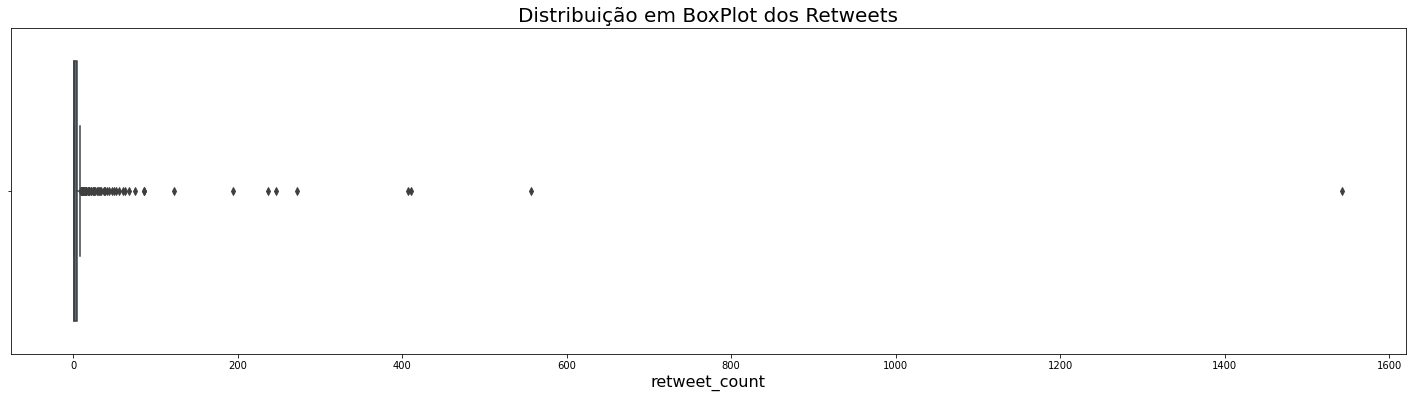

In [ ]:
fig, ax = plt.subplots(figsize=(25,6))

selecao = tweets_df['retweet_count'] >= 1

ax.set_title('Distribuição em BoxPlot dos Retweets', fontsize=20)
ax.set_xlabel('Retweets', fontsize=16)
ax = sns.boxplot(x='retweet_count', data=tweets_df[selecao])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


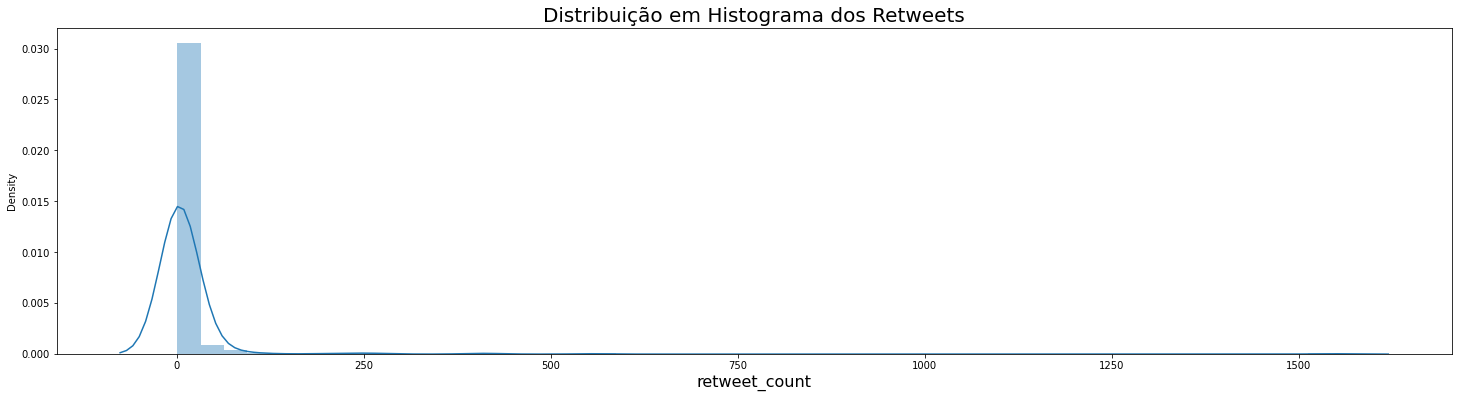

In [ ]:
fig, ax = plt.subplots(figsize=(25,6))

selecao = tweets_df['retweet_count'] >= 1

ax.set_title('Distribuição em Histograma dos Retweets', fontsize=20)
ax.set_xlabel('Retweets', fontsize=16)
ax = sns.distplot(tweets_df['retweet_count'][selecao])

In [ ]:
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_df

,author_id,text,created_at,geo,lang,retweet_count,reply_count,like_count,quote_count,Negative,Neutral,Positive
0,1241844113806409734,https://t.co/e7CfTMpDQj,2022-08-30 17:49:53+00:00,NaN,zxx,0,0,0,0,0.252030,0.476406,0.271564
1,16194637,Conversei com uma pessoa que não confia 100% n...,2022-08-30 17:44:46+00:00,NaN,pt,0,0,0,0,0.103220,0.808822,0.087958
2,1192072181523591168,Eu me retiro carregando a urna eletrônica leva...,2022-08-30 17:27:59+00:00,NaN,pt,0,0,1,0,0.048444,0.873557,0.078000
3,488760669,Urna eletrônica e códigos-fonte são validados ...,2022-08-30 17:26:07+00:00,NaN,pt,0,0,0,0,0.123783,0.830419,0.045797
4,76742645,"@Biakicis Não, ainda. Esperemos até 31.Dez.202...",2022-08-30 17:20:06+00:00,{'place_id': '68e019afec7d0ba5'},pt,0,0,0,0,0.098264,0.836509,0.065227
...,...,...,...,...,...,...,...,...,...,...,...,...
2934,1556035321632100353,TSE lança simulador de votação na urna eletrôn...,2022-08-23 18:08:45+00:00,NaN,pt,0,0,0,0,0.070291,0.885614,0.044095
2935,1262479916915924992,"@Zambelli2210 E os Senadores,vão deixar ele fa...",2022-08-23 18:08:45+00:00,NaN,pt,0,0,0,0,0.079322,0.736071,0.184606
2936,1328696398959828993,As conversas do whatsapp do Adélio são tipo a ...,2022-08-23 18:07:49+00:00,NaN,pt,0,1,2,0,0.134380,0.810202,0.055418
2937,1419627961163071494,TSE lança simulador de votação na urna eletrôn...,2022-08-23 18:07:21+00:00,NaN,pt,0,0,0,0,0.087939,0.868778,0.043283


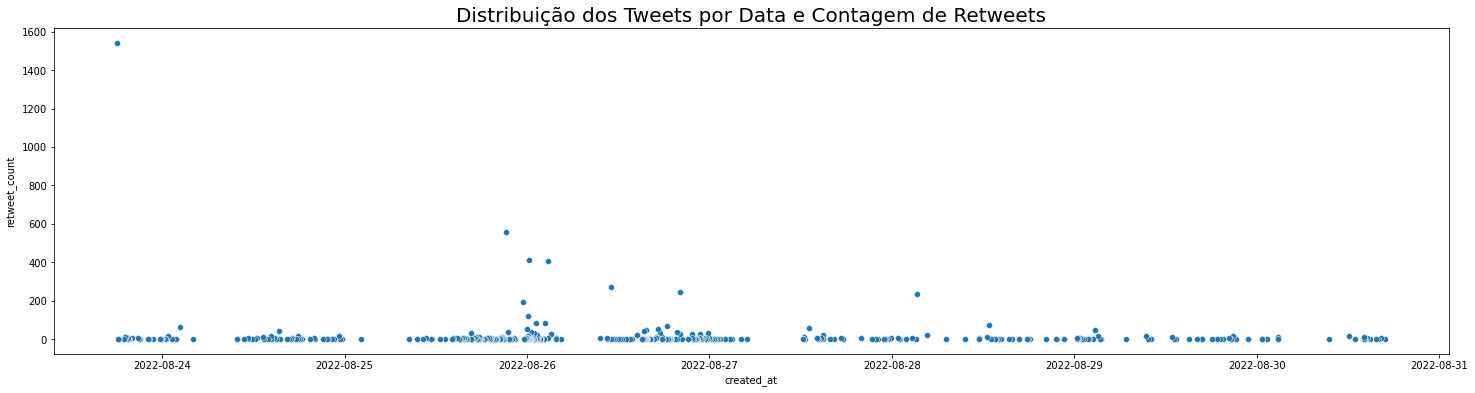

In [ ]:
fig, ax = plt.subplots(figsize=(25,6))

selecao = tweets_df['retweet_count'] > 0

ax.set_title('Distribuição dos Tweets por Data e Contagem de Retweets', fontsize=20)
#ax.set_xlabel('Retweets', fontsize=16)
ax = sns.scatterplot(x='created_at', y='retweet_count', data=tweets_df[selecao])

In [ ]:
correlacoes = tweets_df.corr().round(3)
correlacoes

,author_id,retweet_count,reply_count,like_count,quote_count,Negative,Neutral,Positive
author_id,1.000,-0.037,-0.044,-0.033,-0.046,0.090,-0.074,0.010
retweet_count,-0.037,1.000,0.872,0.983,0.926,-0.013,0.011,-0.002
reply_count,-0.044,0.872,1.000,0.891,0.922,-0.013,0.016,-0.008
like_count,-0.033,0.983,0.891,1.000,0.919,-0.014,0.010,0.001
quote_count,-0.046,0.926,0.922,0.919,1.000,-0.011,0.015,-0.008
Negative,0.090,-0.013,-0.013,-0.014,-0.011,1.000,-0.538,-0.219
Neutral,-0.074,0.011,0.016,0.010,0.015,-0.538,1.000,-0.704
Positive,0.010,-0.002,-0.008,0.001,-0.008,-0.219,-0.704,1.000


In [ ]:
pd.DataFrame(correlacoes['retweet_count'].sort_values(ascending=False))

,retweet_count
retweet_count,1.000
like_count,0.983
quote_count,0.926
reply_count,0.872
Neutral,0.011
Positive,-0.002
Negative,-0.013
author_id,-0.037


#Nuvem de Palavras

In [ ]:
string = pd.Series(tweets_df['text'].values).str.cat(sep=' ')
string

'https://t.co/e7CfTMpDQj Conversei com uma pessoa que não confia 100% na urna eletrônica. É a mesma pessoa que “não mexe com PIX porque não entende e tem medo de fazer errado ou de um hacker roubar tudo”.\n\nSe você conhece alguém assim, conversa e não deixa uma ideia tosca virar um voto nulo/branco. Eu me retiro carregando a urna eletrônica levando para que seja periciada https://t.co/3sjkUmOd61 Urna eletrônica e códigos-fonte são validados por universidades https://t.co/Hb0etTuOWp https://t.co/EmuybG8qU7 @Biakicis Não, ainda. Esperemos até 31.Dez.2022 \n\nA urna eletrônica e a sacrossanta democracia brasileira arrancará o bode da sala e abrirá os caminhos para o vosso amaldiçoado "presidente" ser trancafiado no presídio de Pedrinhas. Votação feita no dia da eleição para auditoria do funcionamento das urnas eletrônicas de seções eleitorais sorteadas no dia anterior. As cédulas de votação são preenchidas e incluídas na urna eletrônica para verificação da regularidade do processo de vot

In [ ]:
# Ignorando classes de palavras
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["Urna Eletrônia","Urna","eletrônica","votação","RT","uso",'eleiçôes',"sobre",'tão','parece',"eleitor",'eleições',"nas","sem",'será',"urnas","votos",'eletronica','eleitoral',"apertar","candidato","eleitores","candidatos","dia","agora","como","número","voto","presidente","meu","todo","eleição","quem","está","até","já","d","partido",'foi',"por","de",'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue','pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','pessoa','likes','vai','que','ou','anos','7dias','tirou','tem','q','0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc'])

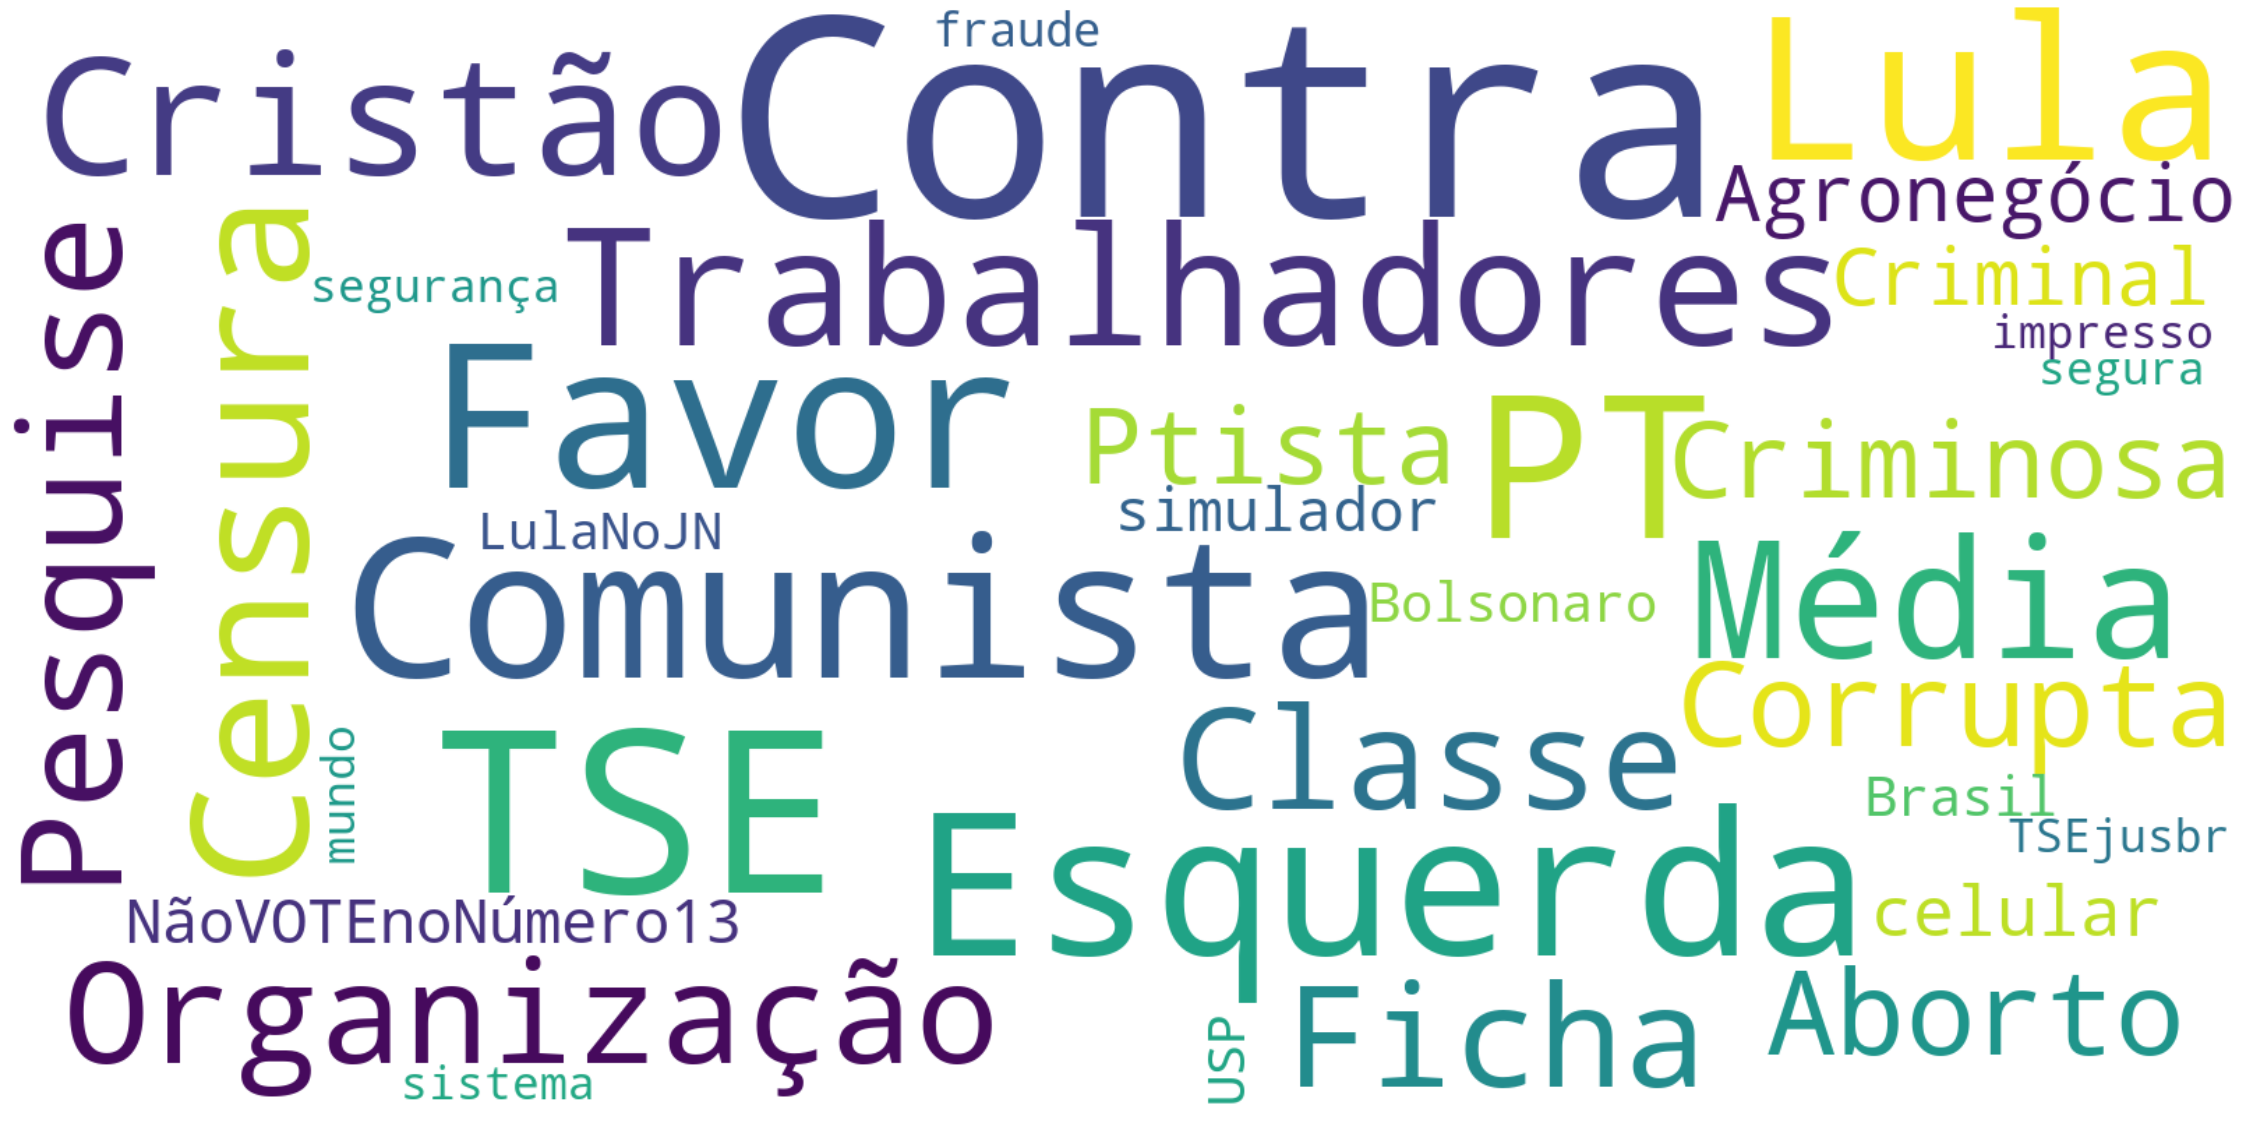

In [ ]:
# Word Cloud com os textos dos tweets
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=35,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Criando e ordenando o dicionário
word_freq={k: v for k, v in sorted(wordcloud.process_text(string).items(),reverse=True, key=lambda item: item[1])}
#Printando resultados em formato dataframa
contagem = pd.DataFrame.from_dict(word_freq, orient='index',columns=['Contagem'])
contagem.head(35)

,Contagem
Contra,517
TSE,324
Favor,249
Lula,246
PT,246
Esquerda,245
Comunista,232
Trabalhadores,231
Cristão,231
Média,231


###Nuvem de Palavras Apenas com os Tweets Mais Repercutidos

Abaixo montamos uma nuvem de palavras apenas levando em conta os tweets que tiveram mais de 100 compartilhamentos, para averiguar se entre os tweets com maior repercussão existe alguma diferença notável no discurso a respeito das urnas

In [ ]:
selecao = tweets_df['retweet_count'] >= 100
tweets_df[selecao].shape[0]

9

In [ ]:
selecao = tweets_df['retweet_count'] >= 50
string = pd.Series(tweets_df['text'][selecao].values).str.cat(sep=' ')
string

'Vou votar no Ciro Gomes com tamanha convicção que tenho medo de quebrar a urna eletrônica ao apertar o 12 com tanta vontade. Será que dá problema com o XANDÃO? 😂 Bela série de reportagens mostrando o tamanho do absurdo (e da roubalheira, confessada em alguns casos) que era a apuração nas eleições antes da urna eletrônica https://t.co/kEffxrp9qe Parece que  Bolsonaro só tá ruim na urna eletrônica? Eleições 2022: urna eletrônica promete ser mais rápida https://t.co/OLJhL0xcRO Urna eletrônica não tem vulnerabilidades, concluem engenheiros da USP https://t.co/t7ogsEpOi3 O Poderoso Xandão já proibiu celular na cabine de votação e agora acaba de proibir o uso do termo “verde-amarelo” na campanha do bicentenário da independência. \n\nO desespero está tão grande que é capaz de proibirem o uso da tecla “2” na urna eletrônica. Engenheiros da USP finalizam teste da urna eletrônica e não encontram vulnerabilidades https://t.co/4V623m3l48 O que o bobo da corte vai aprontar hoje? Que mentira vai co

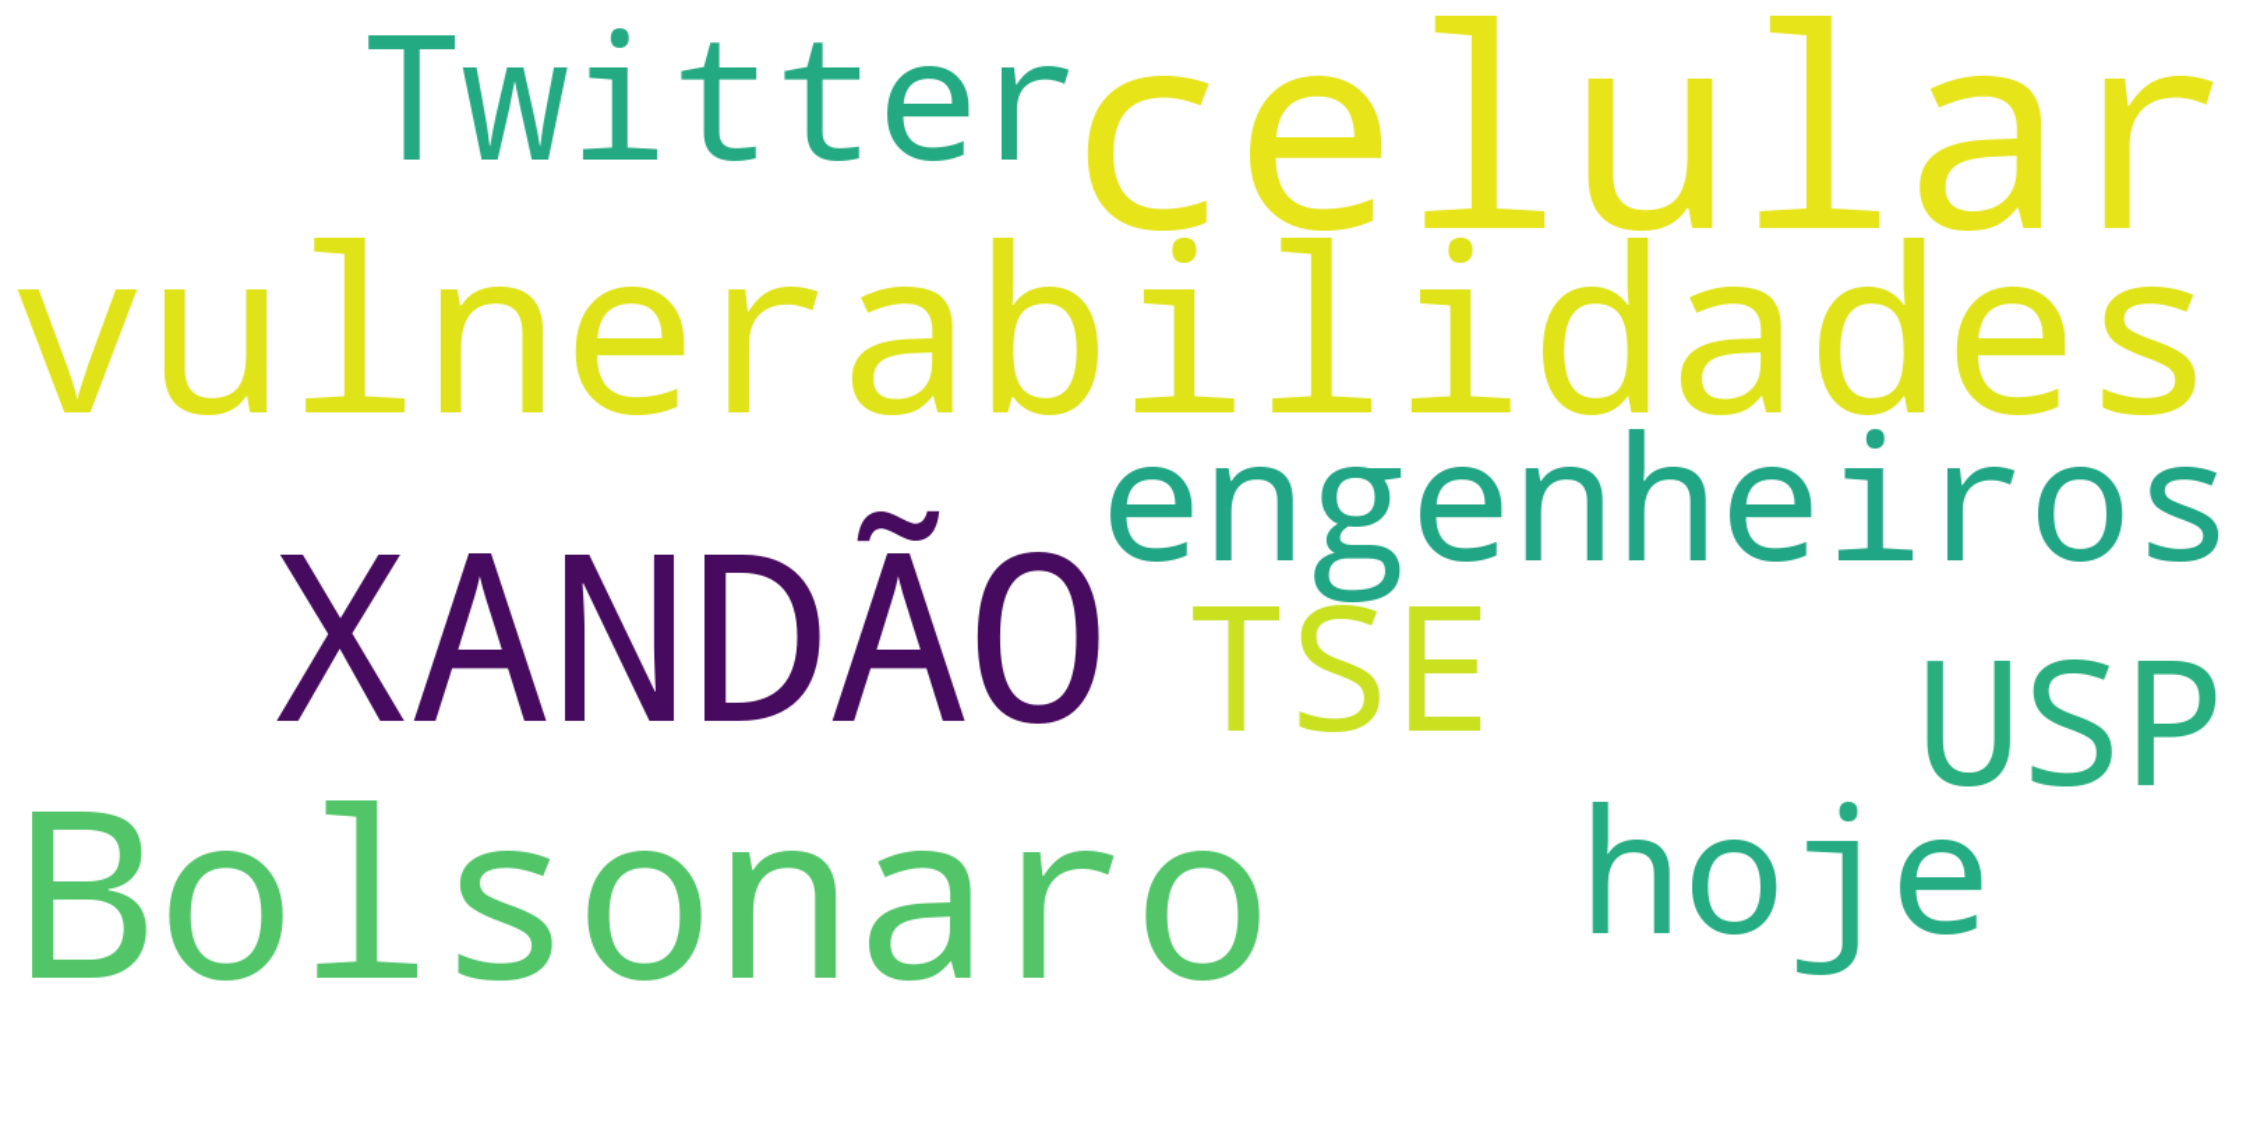

In [ ]:
# Word Cloud com os textos dos tweets
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=9,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Criando e ordenando o dicionário
word_freq={k: v for k, v in sorted(wordcloud.process_text(string).items(),reverse=True, key=lambda item: item[1])}
#Printando resultados em formato dataframa
contagem = pd.DataFrame.from_dict(word_freq, orient='index',columns=['Contagem'])
contagem.head(35)

,Contagem
celular,3
XANDÃO,2
Bolsonaro,2
vulnerabilidades,2
engenheiros,2
USP,2
hoje,2
Twitter,2
TSE,2
Alexandre,2
